In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EXPLORE DATA

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# check missing values
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [ ]:
train_df.describe()
# survived => 38% -> 1
# rata-rata umur penmumpang 29 tahun

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# check duplicate data
train_df.duplicated().sum()

0

In [ ]:
# menghitung penumpang selamat berdasarkan gender
train_df['Sex'].value_counts(dropna = False)
train_df[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

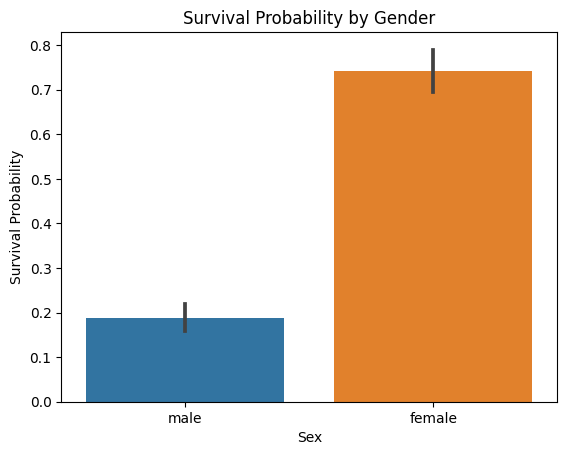

In [ ]:
sns.barplot(x = 'Sex', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

In [ ]:
# menghitung penumpang selamat berdasarkan Pclass
train_df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 1.0, 'Survival Probability by Pclass')

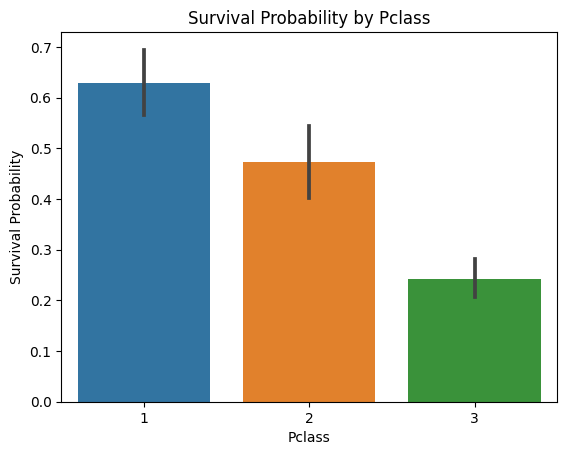

In [ ]:
sns.barplot(x = 'Pclass', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Pclass')

Text(0.5, 1.0, 'Survival Probability by Gender')

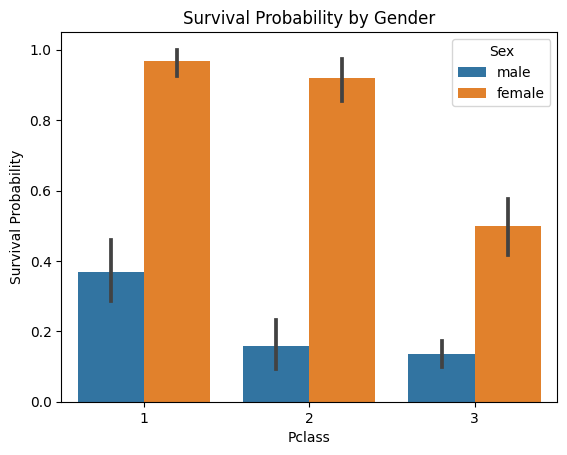

In [ ]:
sns.barplot(x = 'Pclass', y ='Survived', hue='Sex', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Pclass + Gender')

In [ ]:
# embarked

sns.barplot(x = 'Embarked', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Embarked')

NameError: ignored

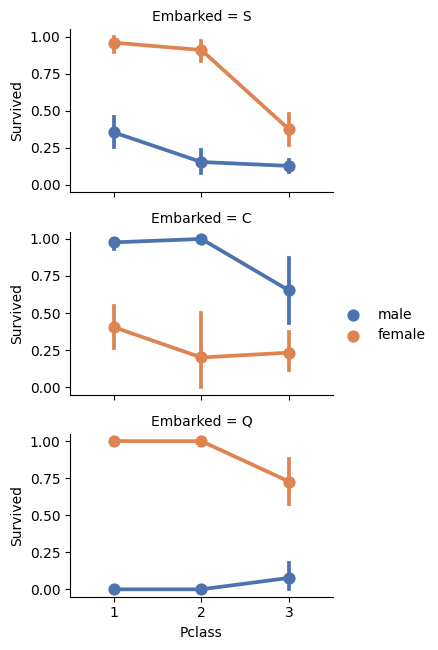

In [ ]:
grid = sns.FacetGrid(train_df, row = 'Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

<AxesSubplot:>

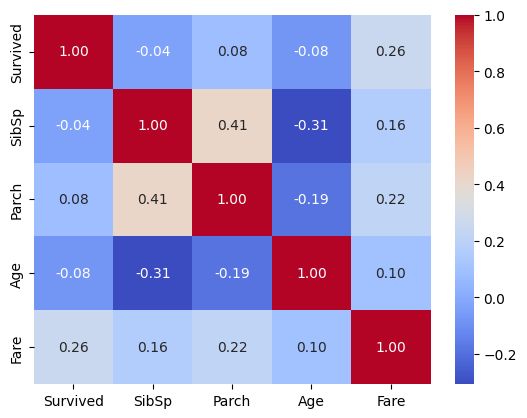

In [ ]:
sns.heatmap(train_df[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

### HANDLE MISSING VALUE

In [ ]:
# CABIN
train_df = train_df.drop('Cabin', axis=1)
display(train_df.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

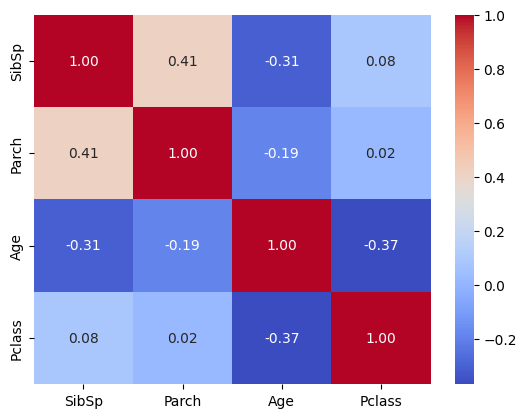

In [ ]:
# AGE
# mencari median umur, berdasarkan variable lainnya
sns.heatmap(train_df[['SibSp', 'Parch', 'Age', 'Pclass']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [ ]:
age_null_index = list(train_df[train_df['Age'].isnull()].index)

median_age = train_df.Age.median()

for i in age_null_index:

    predict_age = train_df[(train_df.SibSp == train_df.loc[i].SibSp)
        & (train_df.Parch == train_df.loc[i].Parch)
        & (train_df.Pclass == train_df.loc[i].Pclass)].Age.median()

    if np.isnan(predict_age):
        train_df['Age'].loc[i] = median_age
    else:
        train_df['Age'].loc[i] = predict_age

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
# EMBARKED
train_df['Embarked'].value_counts() # mencari nilai terbanyak dari embarked

train_df['Embarked'] = train_df['Embarked'].fillna("S")

### FEATURE ENGINEERING

In [ ]:
#remove ticket and passengerId, karena nilai mereka unique sehingga tidak berefek pada proses modelling

train_df = train_df.drop(['PassengerId','Ticket'], axis=1)
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
# mengganti sex menjadi numeric
sex = {"male":0, "female": 1}
train_df['Sex'] = train_df['Sex'].map(sex)
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [ ]:
# mengganti embarked menjadi numeric

port = {"S":0, "C": 1, "Q": 2}
train_df['Embarked'] = train_df['Embarked'].map(port)
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [ ]:
# membuat kolom baru, berisi 1 jika penumpang sendirian, 0 jika tidak sendirian

def is_alone(df):
    if df['SibSp'] + df['Parch'] > 0:
        return 0
    else:
        return 1

train_df['is_alone'] = train_df.apply(is_alone, axis=1)
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1


In [ ]:
# mengganti float menjadi integer
train_df['Fare'] = train_df['Fare'].astype(int)
train_df['Age'] = train_df['Age'].astype(int)

train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,0
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,1


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


Text(0.5, 1.0, 'Survival Probability by Title')

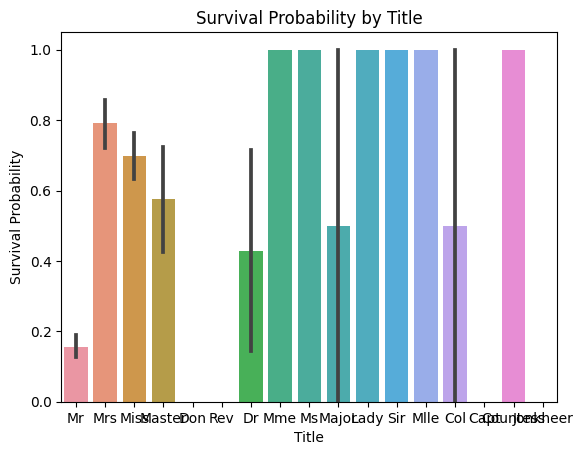

In [ ]:
# membuat kolom baru 'Title' berdasarkan gelar pada kolom nama

train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'].unique()
print(train_df['Title'].value_counts())

sns.barplot(x = 'Title', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Title')

In [ ]:
# mengganti title menjadi numeric

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

train_df['Title'] = train_df['Title'].replace(['Mlle','Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Dr','Rev','Major','Col','Countess','Capt','Sir','Lady','Jonkheer','Don'], 'Rare')
train_df['Title'] = train_df['Title'].map(titles)
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,Title
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,0,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,0,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,1,1


In [ ]:
# menghapus kolom name

train_df = train_df.drop('Name', axis=1)
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,Title
0,0,3,0,22,1,0,7,0,0,1
1,1,1,1,38,1,0,71,1,0,3
2,1,3,1,26,0,0,7,0,1,2
3,1,1,1,35,1,0,53,0,0,3
4,0,3,0,35,0,0,8,0,1,1


In [ ]:
# membagi umur menjadi beberapa kategori

train_df.loc[train_df['Age'] <= 11, 'Age'] = 0
train_df.loc[(train_df['Age'] > 11) & (train_df['Age'] <= 18), 'Age'] = 1
train_df.loc[(train_df['Age'] > 18) & (train_df['Age'] <= 25), 'Age'] = 2
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 40), 'Age'] = 3
train_df.loc[(train_df['Age'] > 40) & (train_df['Age'] <= 65), 'Age'] = 4
train_df.loc[train_df['Age'] > 65, 'Age'] = 5

train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,Title
0,0,3,0,2,1,0,7,0,0,1
1,1,1,1,3,1,0,71,1,0,3
2,1,3,1,3,0,0,7,0,1,2
3,1,1,1,3,1,0,53,0,0,3
4,0,3,0,3,0,0,8,0,1,1


Text(0.5, 1.0, 'Survival Probability by Age')

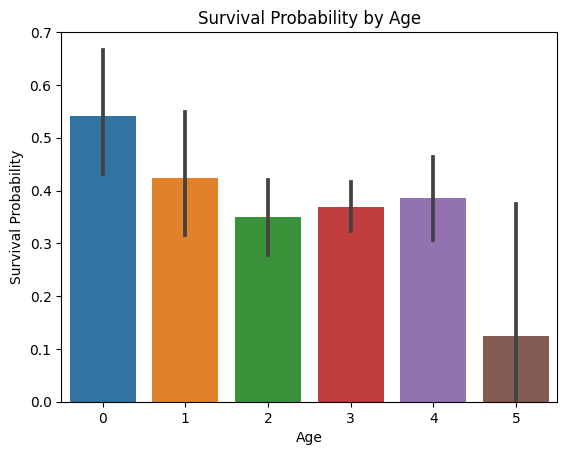

In [ ]:
sns.barplot(x = 'Age', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Age')

In [ ]:
# membagi Fare menjadi beberapa kategori

train_df.loc[train_df['Fare'] <= 7, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7) & (train_df['Fare'] <= 15), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 15) & (train_df['Fare'] <= 30), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 30) & (train_df['Fare'] <= 99), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 99) & (train_df['Fare'] <= 250), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 250), 'Fare'] = 5
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,Title
0,0,3,0,2,1,0,0,0,0,1
1,1,1,1,3,1,0,3,1,0,3
2,1,3,1,3,0,0,0,0,1,2
3,1,1,1,3,1,0,3,0,0,3
4,0,3,0,3,0,0,1,0,1,1


Text(0.5, 1.0, 'Survival Probability by Fare')

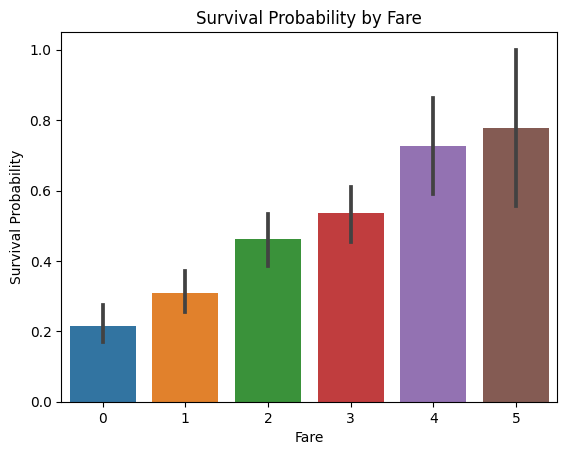

In [ ]:
sns.barplot(x = 'Fare', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Fare')

# ML PART !!!

In [ ]:
# memisahkan label dan dataset

y = train_df['Survived']
X = train_df.drop('Survived',axis=1)
display(X.head(5))

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,Title
0,3,0,2,1,0,0,0,0,1
1,1,1,3,1,0,3,1,0,3
2,3,1,3,0,0,0,0,1,2
3,1,1,3,1,0,3,0,0,3
4,3,0,3,0,0,1,0,1,1


In [ ]:
len(X)

891

In [ ]:
# membagi data menjadi data training dan validation

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=2022, stratify=y)
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

757
757
134
134


In [ ]:
# melakukan training dengan random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# mengukur performa model

from sklearn import metrics

expected_y  = y_val
predicted_y = random_forest.predict(X_val)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        83
           1       0.80      0.73      0.76        51

    accuracy                           0.83       134
   macro avg       0.82      0.81      0.81       134
weighted avg       0.83      0.83      0.83       134

[[74  9]
 [14 37]]


In [ ]:
# menggunakan knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
expected_y  = y_val
predicted_y = knn.predict(X_val)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        83
           1       0.77      0.71      0.73        51

    accuracy                           0.81       134
   macro avg       0.80      0.79      0.79       134
weighted avg       0.80      0.81      0.80       134

[[72 11]
 [15 36]]


# Deployment

In [ ]:
import pickle

pickle.dump(random_forest, open("rf_titanic.pkl", 'wb'))

In [ ]:
rf_model = pickle.load(open("rf_titanic.pkl", 'rb'))

In [ ]:
from sklearn import metrics

expected_y  = y_val
predicted_y = rf_model.predict(X_val)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        83
           1       0.80      0.73      0.76        51

    accuracy                           0.83       134
   macro avg       0.82      0.81      0.81       134
weighted avg       0.83      0.83      0.83       134

[[74  9]
 [14 37]]


### CONTOHIN BIKIN API

In [ ]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,Title
447,1,0,3,0,0,2,0,1,1
851,3,0,5,0,0,0,0,1,1
685,2,0,2,1,2,3,1,0,1
709,3,0,2,1,1,1,1,0,4
724,1,0,3,1,0,3,0,0,1


In [ ]:
new_data = [{
    'Pclass':2,
    'Sex':0,
    'Age':3,
    'SibSp':0,
    'Parch':0,
    'Fare':1,
    'Embarked':1,
    'is_alone':1,
    'Title':1
}]

new_data = pd.DataFrame(new_data)
is_survive = rf_model.predict(new_data)
prob = rf_model.predict_proba(new_data)
print(is_survive,prob)

[0] [[0.68102924 0.31897076]]


In [ ]:
train_df['Age_Class']= train_df['Age']* train_df['Pclass']
train_df['Fare_Per_Person'] = train_df['Fare']/(train_df['relatives']+1)
train_df['Fare_Per_Person'] = train_df['Fare_Per_Person'].astype(int)

In [ ]:
train_df = train_df.drop(['Parch','not_alone'], axis=1)

In [ ]:
train_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
407,1,2,0,0,1,2,0,2,8,4,0,0
359,1,3,1,2,0,0,2,0,8,2,6,0
413,0,2,0,3,0,0,0,0,8,1,6,0
192,1,3,1,2,1,0,0,1,8,2,6,0
790,0,3,0,5,0,0,2,0,8,1,15,0
296,0,3,0,3,0,0,1,0,8,1,9,0
728,0,2,0,3,1,2,0,1,8,1,6,1
444,1,3,0,6,0,1,0,0,8,1,18,1
153,0,3,0,5,0,1,0,2,8,1,15,0
781,1,1,1,1,1,3,0,1,2,3,1,1


In [ ]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2022)

In [ ]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
from sklearn import metrics

expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        91
           1       0.76      0.67      0.72        43

    accuracy                           0.83       134
   macro avg       0.81      0.79      0.80       134
weighted avg       0.82      0.83      0.83       134

[[82  9]
 [14 29]]


In [ ]:
sorted(zip(model.feature_importances_,X.columns))

[(65, 'Sex'),
 (94, 'SibSp'),
 (139, 'Pclass'),
 (177, 'Title'),
 (185, 'Fare_Per_Person'),
 (199, 'Embarked'),
 (204, 'Deck'),
 (235, 'relatives'),
 (370, 'Fare'),
 (404, 'Age_Class'),
 (535, 'Age')]

In [ ]:
model.booster_.save_model('lgbm_titanic.txt')

In [ ]:
X_test = X_test.reset_index(drop=True)
X_test[:1]

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,3,0,1,0,0,8,1,9,1


In [ ]:
X_test_rand

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person


In [ ]:
model.predict(X_test[0:20])

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [ ]:
new_value = {
    'Pclass' : [2],
    'Sex' : [1],
    'Age' : [4],
    'SibSp' : [0],
    'Fare' : [2],
    'Embarked' : [0],
    'relatives' : [2],
    'Deck' : [6],
    'Title' : [1],
    'Age_Class': [8],
    'Fare_Per_Person' : [1],
}
X_test_rand = pd.DataFrame(new_value)

X_test_rand

model.predict(X_test_rand)

array([1], dtype=int64)

In [ ]:
lgb_model = lgbm.Booster(model_file='lgbm_titanic.txt')
lgb_model.predict(X_test_rand)

array([0.58367763])

In [ ]:
expected_y  = y_test
predicted_y = lgb_model.predict(X_test)
predicted_y = [1 if x > 0.5 else 0 for x in predicted_y]
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        91
           1       0.76      0.67      0.72        43

    accuracy                           0.83       134
   macro avg       0.81      0.79      0.80       134
weighted avg       0.82      0.83      0.83       134

[[82  9]
 [14 29]]


In [ ]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [ ]:
import re

asuw = "asd, Mr. asdf"
re.search(' ([A-Za-z]+)\.', asuw).group(1)

'Mr'

In [ ]:
is_survive_probs = 0.51
is_survive = 1 if is_survive_probs > 0.5 else 0
is_survive

1